### Standard package import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # to ignore any warnings

### Data Pre-processing

The data files we found on the source page already had this data splitted into training and test data. Hence, we did not need to split the data with any Sci-kit methods.

In [2]:
#importing the data as Pandas Dataframes.
data_train=pd.read_csv("poker-hand-training-true.data",header=None) #importing training data into dataframe
data_test = pd.read_csv("poker-hand-testing.data",header=None)      #importing test data into dataframe

#defining the columns in the data
col=['Suit of card #1','Rank of card #1','Suit of card #2','Rank of card #2','Suit of card #3','Rank of card #3','Suit of card #4','Rank of card #4','Suit of card #5','Rank of card 5','Poker Hand']
col

['Suit of card #1',
 'Rank of card #1',
 'Suit of card #2',
 'Rank of card #2',
 'Suit of card #3',
 'Rank of card #3',
 'Suit of card #4',
 'Rank of card #4',
 'Suit of card #5',
 'Rank of card 5',
 'Poker Hand']

In [3]:
data_train.columns=col
data_test.columns=col

In [4]:
#manually splitting the dataset into training and testing data.

y_train=data_train['Poker Hand']
y_test=data_test['Poker Hand']
y_train=pd.get_dummies(y_train) # to convert series to dummy codes.
y_test=pd.get_dummies(y_test)   # to convert series to dummy codes. 
x_train=data_train.drop('Poker Hand',axis=1)
x_test=data_test.drop('Poker Hand',axis=1)

In [5]:
#Checking the shape of the Training and Testing set of data.

print('Shape of Training Set:',x_train.shape)
print('Shape of Testing Set:',x_test.shape)

Shape of Training Set: (25010, 10)
Shape of Testing Set: (1000000, 10)


In [6]:
#Viewing the first few rows of the data in the training data.

x_train.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


### Building models for the Poker Hand prediction

### 1. NEURAL NETWORK MODEL:

To create NN we used Keras library which is a high-level API wrapper for the low-level API, capable of running on top of TensorFlow, CNTK, or Theano.
The neural network architecture we used here is comprised of 3 dense layers with respectively 15,10 and 10 nodes in each layer.

In [7]:
#importing the required libraries to build Neural Network model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

#Building the Neural Network model
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))      #adding a dense layer with 15 nodes
model.add(Dense(10, activation='relu'))                    #adding 2nd dense layer with 10 nodes
model.add(Dense(10, activation='softmax'))                 #adding 3rd dense layer with 10 nodes
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Fitting the data into the model
history = model.fit(x_train, y_train, epochs = 10, batch_size = 256, verbose=1,validation_data=(x_test,y_test),shuffle=True)

#Evaluating the model
score = model.evaluate(x_test, y_test, batch_size=256)

Using TensorFlow backend.


Train on 25010 samples, validate on 1000000 samples
Epoch 1/10
25010/25010 [==============================] - 6s 242us/step - loss: 0.2417 - accuracy: 0.8961 - val_loss: 0.3704 - val_accuracy: 0.8768
Epoch 2/10
25010/25010 [==============================] - 5s 212us/step - loss: 0.1802 - accuracy: 0.8984 - val_loss: 0.4269 - val_accuracy: 0.8897
Epoch 3/10
25010/25010 [==============================] - 5s 218us/step - loss: 0.1755 - accuracy: 0.9005 - val_loss: 0.4683 - val_accuracy: 0.8896
Epoch 4/10
25010/25010 [==============================] - 5s 215us/step - loss: 0.1742 - accuracy: 0.9019 - val_loss: 0.4859 - val_accuracy: 0.8911
Epoch 5/10
25010/25010 [==============================] - 5s 219us/step - loss: 0.1734 - accuracy: 0.9030 - val_loss: 0.5068 - val_accuracy: 0.8900
Epoch 6/10
25010/25010 [==============================] - 5s 212us/step - loss: 0.1730 - accuracy: 0.9033 - val_loss: 0.5190 - val_accuracy: 0.8876
Epoch 7/10
25010/25010 [==============================] - 5s

### Validation accuracy is coming out to be 88.81% .

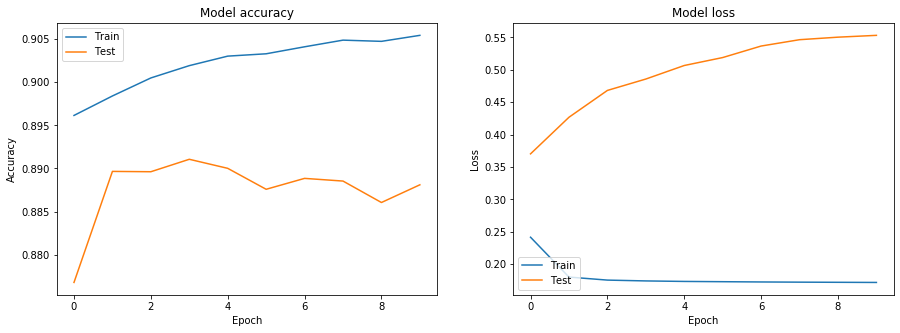

In [8]:
# Plotting the Neural Network Model's accuracy and the Model loss

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')

In [9]:
#We need to reformat the data to be used in the models we are going to build moving forward
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(data_train['Poker Hand'])
y_test=le.fit_transform(data_test['Poker Hand'])

### 2. LOGISTIC REGRESSION MODEL

We used the Sci-kit Learn Library to import all algorithms and employed the Logistic Regression method of model selection to use Logistic Regression Algorithm.

In [10]:
#importing the required libraries to build Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#building the Logistic Regressing model and fittin the data into the model
clf = LogisticRegression(random_state=641, solver='lbfgs',max_iter=100,multi_class='ovr').fit(x_train, y_train)

#using this model to predict the values of test data set
y_pred=clf.predict(x_test)

#evaluating the model
accuracy_score(y_pred,y_test)

0.422498

### As you can see the validation accuracy is surprisingly low as compared to that of Neural Network.
### Validation accuracy is 42.25%!!

### 3. CLASSIFICATION AND REGRESSION TREES for Machine Learning (CART)

Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.
The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

We used the Sci-kit Learn Library to import all algorithms and employed the Decision Tree method of model selection to use Decision Tree Algorithm.

In [11]:
#importing the required libraries to build Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#building the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0,max_depth = 2)

#fitting the data into the model
decision_tree = decision_tree.fit(x_train,y_train)

#using this model to predict the values of test data set
y_pred = decision_tree.predict(x_test)

#evaluating the model
accuracy_score(y_pred,y_test)

0.422498

### Again the validation accuracy is surprisingly low and is very similar to that of Logistic Regression.
### Validation accuracy is 42.25%!!

### 4. SUPPORT VECTOR MACHINE (SVM) MODEL

In [18]:
#importing the required libraries to build Support Vector Machine model
from sklearn import svm

#building the Support Vector Machine Model
clf = svm.LinearSVC(random_state=23)

#fitting the data into the model
clf.fit(x_train,y_train)

#using this model to predict the values of test data set
y_pred = clf.predict(x_test)

#evaluating the model
accuracy_score(y_pred,y_test)

0.422498

### The validation accuracy achieved here is 42.25% which is also really low.

##### Through this we tried to build different classification models to predict the possible Poker Hands. The best model we have built and worked best for us is the NEURAL NETWORK MODEL.